In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame({'sleep_proportion':[0.2,0.4,0.5,0.7],'grumpy_proportion':[0.1,0.6,0.2,0.9],'prediction':['kitten','kitten','kitten','adult']})
df

,grumpy_proportion,prediction,sleep_proportion
0,0.1,kitten,0.2
1,0.6,kitten,0.4
2,0.2,kitten,0.5
3,0.9,adult,0.7


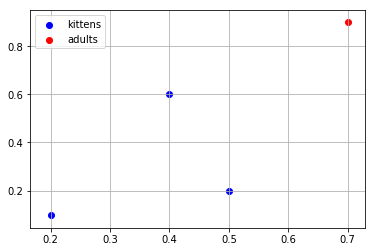

In [3]:
kittens=df[df['prediction']=='kitten']
adults=df[df['prediction']=='adult']
plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],color='b',label='kittens')
plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'],color='r',label='adults')
plt.grid()
plt.legend()

In [4]:
df['bprediction']=df['prediction'].apply(lambda x:x=='kitten')
from sklearn.linear_model import Perceptron
classifier=Perceptron(max_iter=1000)
model=classifier.fit(df[['sleep_proportion','grumpy_proportion']],df['bprediction'])
df

,grumpy_proportion,prediction,sleep_proportion,bprediction
0,0.1,kitten,0.2,True
1,0.6,kitten,0.4,True
2,0.2,kitten,0.5,True
3,0.9,adult,0.7,False


In [5]:
model.predict([[0.4,0.4],[0.9,0.9]])

array([ True, False], dtype=bool)

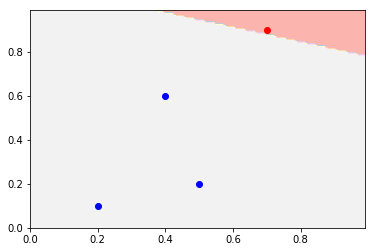

In [6]:
x_min,x_max=0,1
y_min,y_max=0,1

xx,yy=np.meshgrid(np.arange(x_min,x_max,.01),np.arange(x_min,x_max,.01))
#print(xx),#print(yy);

xx_lin=xx.ravel();#print(xx_lin[0:10]);
yy_lin=yy.ravel();#print(yy_lin[0:10]);

pred_input=np.c_[xx_lin,yy_lin];#print(pred_input[0:20])
Z=model.predict(pred_input);#print(Z);
Z=Z.reshape(xx.shape);#print(Z);
plt.contourf(xx,yy,Z,cmap=plt.cm.Pastel1)
plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],color='b',label='kittens')
plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'],color='r',label='adults')
plt.grid([0,1,0,1])
plt.grid()

In [7]:
print("Weight_0: "+str(model.coef_[0,0]))
print("Weight_1: "+str(model.coef_[0,1]))
print("Threshold: "+str(model.intercept_))
print((model.coef_[0,0]*df['sleep_proportion'])+(model.coef_[0,1]*df['grumpy_proportion']))

Weight_0: -0.3
Weight_1: -0.9
Threshold: [ 1.]
0   -0.15
1   -0.66
2   -0.33
3   -1.02
dtype: float64


In [8]:
from sklearn.svm import SVC
SVCClassifier=SVC(kernel='linear',C=10,max_iter=100)
SVCModel=SVCClassifier.fit(df[['sleep_proportion','grumpy_proportion']],df['bprediction'])

[ True False]


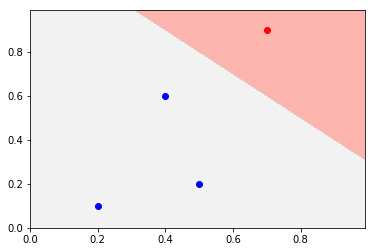

In [9]:
SVC_Z=SVCModel.predict(pred_input)
SVC_Z=SVC_Z.reshape(xx.shape)
print(SVCModel.predict([[0,0],[1,1]]))
plt.contourf(xx,yy,SVC_Z,cmap=plt.cm.Pastel1)
plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],color='b',label='kittens')
plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'],color='r',label='adults')
plt.grid([0,1,0,1])
plt.grid()